# Case Study: Sentiment Analysis

### Data Prep

In [1]:
friends_chars={} 
Rachel=[]
Ross=[]
Joey=[]
Chandler=[]
Phoebe=[]
Monica=[]
with open("transcripts_friends/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        if line.startswith('Rachel:'):
            Rachel.append(line[8:])
        elif line.startswith('Ross:'):
            Ross.append(line[6:])
        elif line.startswith('Monica:'):
            Monica.append(line[8:])
        elif line.startswith('Chandler:'):
            Chandler.append(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe.append(line[8:])
        if line.startswith('Joey:'):
            Joey.append(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey



In [2]:
import pandas as pd

df1 = pd.DataFrame(friends_chars['CHANDLER'])
df2 = pd.DataFrame(friends_chars['JOEY'])
df3 = pd.DataFrame(friends_chars['PHOEBE'])
df4 = pd.DataFrame(friends_chars['RACHEL'])
df5 = pd.DataFrame(friends_chars['ROSS'])
df6 = pd.DataFrame(friends_chars['MONICA'])

In [3]:
pd.options.display.max_colwidth = 100

In [4]:
df1.head()

,0
0,"You know, I'd love to, but I'm a little tired.\n"
1,You're on!\n
2,"He could be alone. This morning I heard him do push-ups, and then talk to his triceps.\n"
3,She's cheating on Joey with Ross!\n
4,Wow!\n


In [5]:
listOfCharacters1 = [False] *df1.shape[0]
listOfCharacters2 = [False] *df2.shape[0]
listOfCharacters3 = [False] *df3.shape[0]
listOfCharacters4 = [False] *df4.shape[0]
listOfCharacters5 = [True] *df5.shape[0]
listOfCharacters6 = [False] *df6.shape[0]


In [6]:
df1['Ross'] = listOfCharacters1
df2['Ross'] = listOfCharacters2 
df3['Ross'] = listOfCharacters3
df4['Ross'] = listOfCharacters4
df5['Ross'] = listOfCharacters5
df6['Ross'] = listOfCharacters6


In [7]:
df1=df1.rename(columns={0: 'Dialogue'})
df2=df2.rename(columns={0: 'Dialogue'})
df3=df3.rename(columns={0: 'Dialogue'})
df4=df4.rename(columns={0: 'Dialogue'})
df5=df5.rename(columns={0: 'Dialogue'})
df6=df6.rename(columns={0: 'Dialogue'})

In [8]:
df = pd.concat([df1, df2,df3,df4,df5,df6])
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Dialogue,Ross
0,(interrupting) Hey! Chef Geller! Y’know that little speech you made the other day? Well I got a ...,False
1,He's planning your birthday party.\n,False
2,It just keeps getting worse and worse! Y'know? I mean it’s bad enough that I’m in love with my r...,False
3,"Sorry, I’m sorry. Close, close, close...\n",True
4,I know!\n,False


In [9]:
df.head(10)

,Dialogue,Ross
0,(interrupting) Hey! Chef Geller! Y’know that little speech you made the other day? Well I got a ...,False
1,He's planning your birthday party.\n,False
2,It just keeps getting worse and worse! Y'know? I mean it’s bad enough that I’m in love with my r...,False
3,"Sorry, I’m sorry. Close, close, close...\n",True
4,I know!\n,False
5,"Yeah, yeah. We went to a Mets game, we got Chinese food, and you know, I love this woman. You ha...",False
6,"I just—I thought you guys were doing it, I didn't know you were in love!\n",False
7,"Hey I was crying because, because nobody believed Quincy’s theory. Okay?\n",False
8,But I didn't get to shape my belly like a bowl full of jelly.\n,False
9,(sliding into Joey’s place on the couch to try and talk to Phoebe) Huh? What’d ya say Joe? I’ll ...,False


In [10]:
from io import StringIO
col = [ 'Dialogue','Ross']
df = df[col]
df = df[pd.notnull(df['Dialogue'])]
df.columns = ['Dialogue', 'Ross']
category_id_df = df[['Dialogue', 'Ross']]
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Ross', 'Dialogue']].values)
df.head(10)


,Dialogue,Ross
0,(interrupting) Hey! Chef Geller! Y’know that little speech you made the other day? Well I got a ...,False
1,He's planning your birthday party.\n,False
2,It just keeps getting worse and worse! Y'know? I mean it’s bad enough that I’m in love with my r...,False
3,"Sorry, I’m sorry. Close, close, close...\n",True
4,I know!\n,False
5,"Yeah, yeah. We went to a Mets game, we got Chinese food, and you know, I love this woman. You ha...",False
6,"I just—I thought you guys were doing it, I didn't know you were in love!\n",False
7,"Hey I was crying because, because nobody believed Quincy’s theory. Okay?\n",False
8,But I didn't get to shape my belly like a bowl full of jelly.\n,False
9,(sliding into Joey’s place on the couch to try and talk to Phoebe) Huh? What’d ya say Joe? I’ll ...,False


In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


In [12]:
import re
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Dialogue'] = df['Dialogue'].apply(clean_text)
df['Dialogue'] = df['Dialogue'].str.replace('\d+', '')
df.head()

,Dialogue,Ross
0,interrupting hey chef geller yknow little speech made day well got problem,False
1,hes planning birthday party,False
2,keeps getting worse worse yknow mean bad enough im love roommates girlfriendwhich way think know...,False
3,sorry im sorry close close close,True
4,know,False


In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [14]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['Dialogue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 6637 unique tokens.


{'\n': 1,
 'i': 2,
 'you': 3,
 'the': 4,
 'to': 5,
 'a': 6,
 'and': 7,
 'that': 8,
 'it': 9,
 'what': 10,
 'of': 11,
 'is': 12,
 'no': 13,
 'in': 14,
 'oh': 15,
 'this': 16,
 'me': 17,
 'we': 18,
 'okay': 19,
 'so': 20,
 'just': 21,
 'not': 22,
 'have': 23,
 'do': 24,
 'my': 25,
 'with': 26,
 'was': 27,
 'on': 28,
 'he': 29,
 'know': 30,
 'well': 31,
 'for': 32,
 'all': 33,
 'yeah': 34,
 'be': 35,
 'her': 36,
 'are': 37,
 'but': 38,
 'hey': 39,
 'right': 40,
 'at': 41,
 'up': 42,
 'out': 43,
 'get': 44,
 'like': 45,
 "i'm": 46,
 'your': 47,
 'gonna': 48,
 'can': 49,
 'i’m': 50,
 'monica': 51,
 'him': 52,
 'joey': 53,
 'if': 54,
 'think': 55,
 'about': 56,
 'go': 57,
 'look': 58,
 'here': 59,
 'his': 60,
 'she': 61,
 'really': 62,
 'don’t': 63,
 "it's": 64,
 'one': 65,
 'ross': 66,
 'did': 67,
 'they': 68,
 'it’s': 69,
 "don't": 70,
 'there': 71,
 'now': 72,
 'yes': 73,
 'uh': 74,
 'see': 75,
 'why': 76,
 'mean': 77,
 'how': 78,
 'got': 79,
 'good': 80,
 'because': 81,
 'when': 82,
 "th

In [15]:
X = tokenizer.texts_to_sequences(df['Dialogue'].values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (99233, 120)


array([[   0,    0,    0, ...,   31,   79,  386],
       [   0,    0,    0, ..., 2208,  510,  343],
       [   0,    0,    0, ..., 1495, 1495,  562],
       ...,
       [   0,    0,    0, ...,  205,  280,  454],
       [   0,    0,    0, ...,   65, 2247, 1843],
       [   0,    0,    0, ...,  329, 1131,  813]], dtype=int32)

In [16]:
Y = pd.get_dummies(df['Ross']).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(66486, 120) (66486, 2)
(32747, 120) (32747, 2)


In [18]:
X_test

array([[   0,    0,    0, ...,  222, 1349,  847],
       [   0,    0,    0, ..., 1858, 1218,  704],
       [   0,    0,    0, ..., 6371,   94,  509],
       ...,
       [   0,    0,    0, ...,  801,  123,  440],
       [   0,    0,    0, ...,  292,   34,   34],
       [   0,    0,    0, ...,  824,  103,  305]], dtype=int32)

In [19]:
Y_test


array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [20]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [21]:
X.shape[1]

120

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

W1102 11:33:18.912900 4644539840 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 70s 1ms/sample - loss: 0.4589 - accuracy: 0.8205 - val_loss: 0.4455 - val_accuracy: 0.8210
Epoch 2/10
59837/59837 [==============================] - 67s 1ms/sample - loss: 0.4214 - accuracy: 0.8297 - val_loss: 0.4336 - val_accuracy: 0.8242
Epoch 3/10
59837/59837 [==============================] - 70s 1ms/sample - loss: 0.3976 - accuracy: 0.8391 - val_loss: 0.4297 - val_accuracy: 0.8263
Epoch 4/10
59837/59837 [==============================] - 70s 1ms/sample - loss: 0.3798 - accuracy: 0.8462 - val_loss: 0.4305 - val_accuracy: 0.8288
Epoch 5/10
59837/59837 [==============================] - 70s 1ms/sample - loss: 0.3629 - accuracy: 0.8526 - val_loss: 0.4288 - val_accuracy: 0.8305
Epoch 6/10
59837/59837 [==============================] - 70s 1ms/sample - loss: 0.3481 - accuracy: 0.8588 - val_loss: 0.4230 - val_accuracy: 0.8313
Epoch 7/10
59837/59837 [==============================] -

In [24]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

NameError: name 'EarlyStopping' is not defined

In [23]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32747/32747 [==============================] - 25s 751us/sample - loss: 0.4229 - accuracy: 0.8427
Test set
  Loss: 0.423
  Accuracy: 0.843


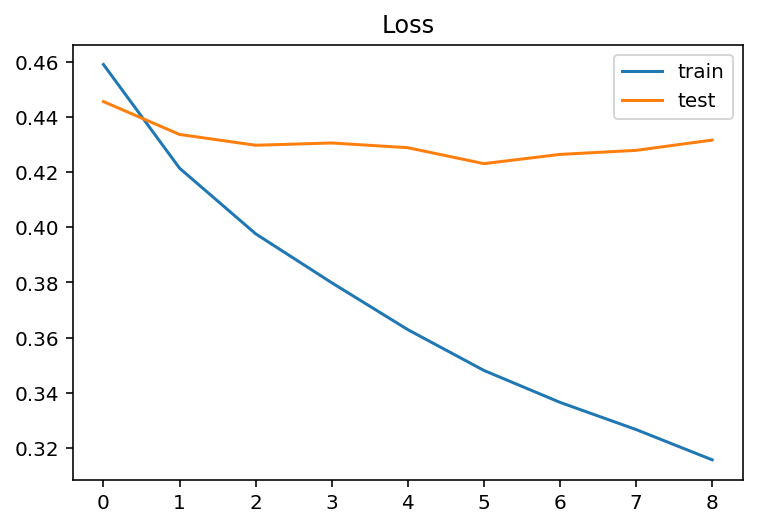

In [24]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [25]:
#model = LinearSVC()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
#"model.fit(X_train, y_train)
# X_test = X_test.reshape(X_test.shape[1:])
# X_test=X_test.transpose()
y_pred = model1.predict(X_test)
y_pred



array([[0.6988757 , 0.3011243 ],
       [0.99145484, 0.00854519],
       [0.7984851 , 0.2015149 ],
       ...,
       [0.9574008 , 0.04259923],
       [0.8157729 , 0.18422717],
       [0.51431805, 0.48568198]], dtype=float32)

In [26]:
Y_test


array([[0, 1],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [27]:
import numpy as np
probas = np.array(y_pred)
y_pred = np.argmax(probas, axis=-1)    
print(y_pred)

[0 0 0 ... 0 0 0]


In [28]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[1 0 0 ... 0 0 1]


In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, y_pred)



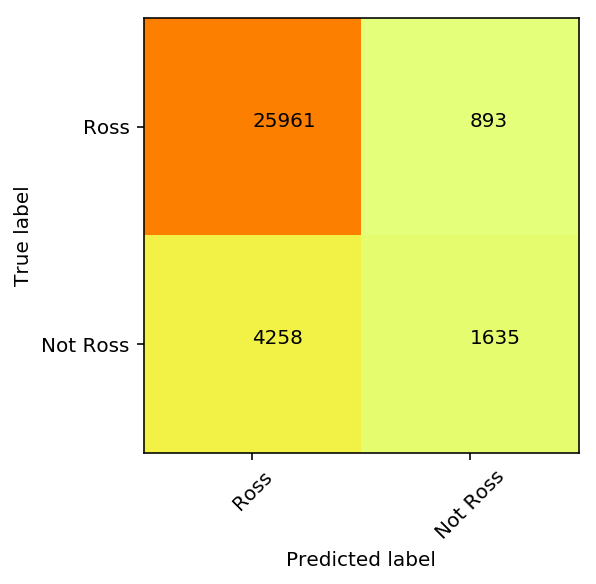

In [30]:
plt.clf()
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Ross','Not Ross']
#plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(conf_mat[i][j]))
plt.show()




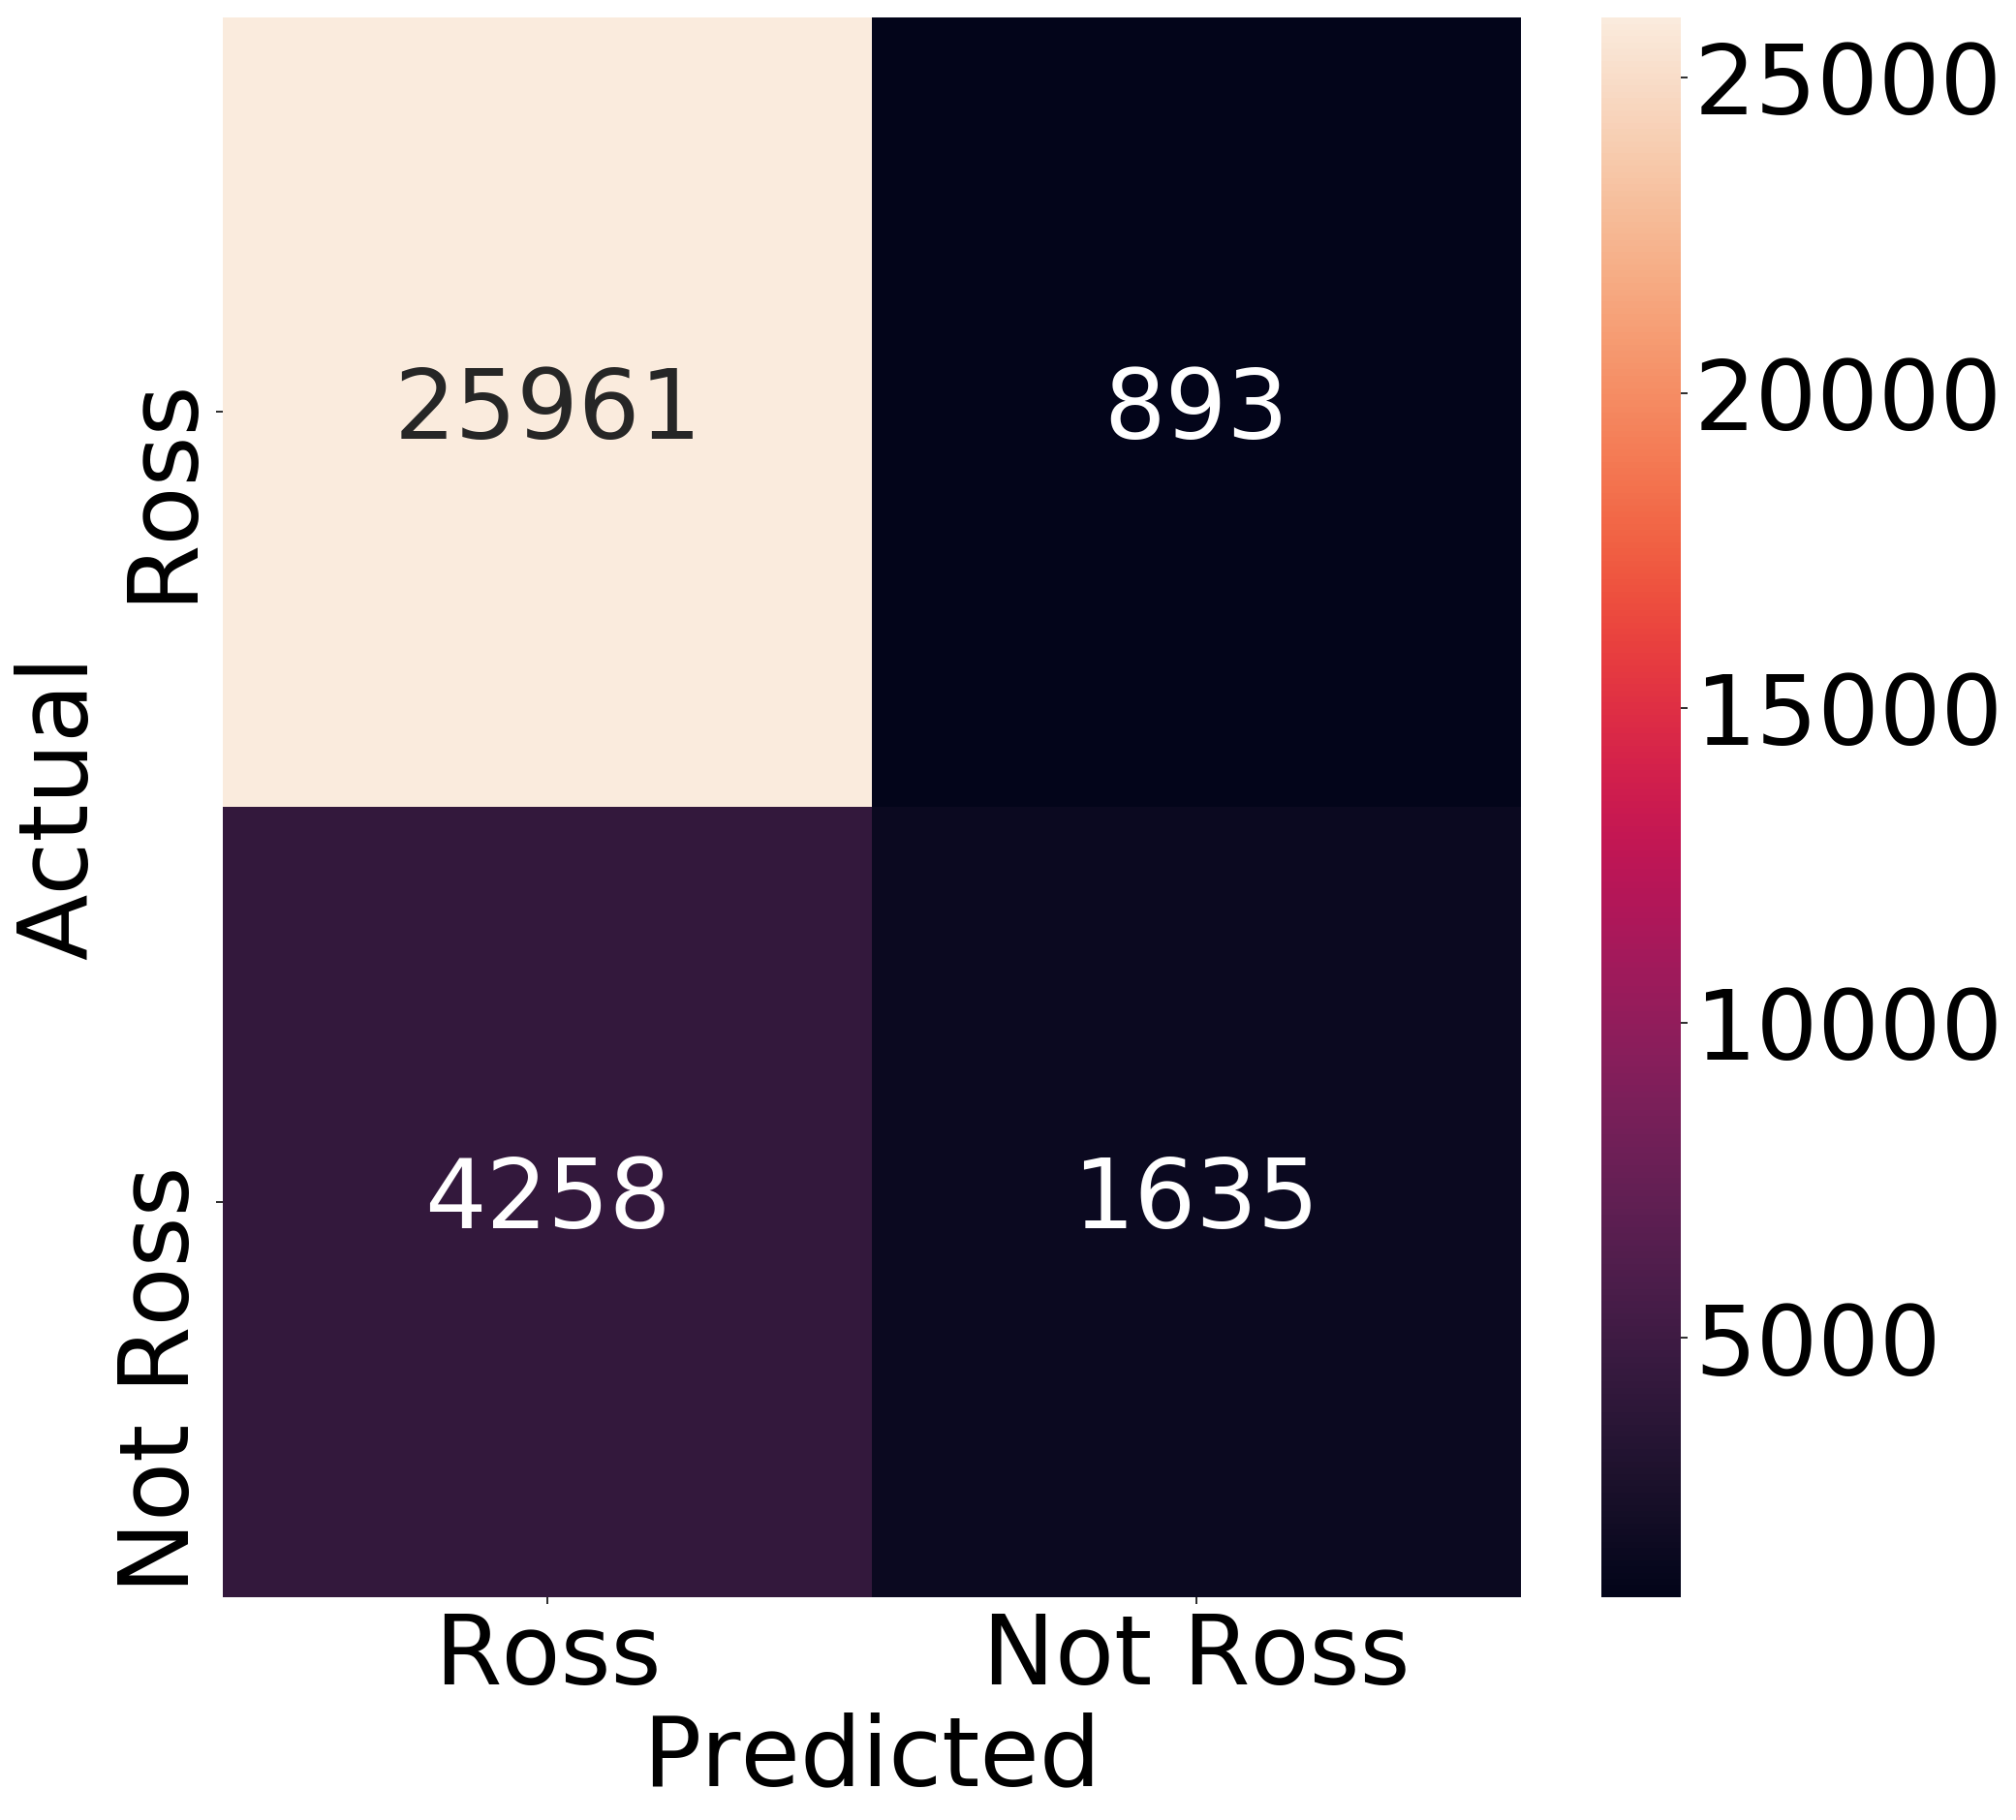

In [34]:
conf_mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=classNames, yticklabels=classNames)
plt.rcParams.update({'font.size': 50})

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [31]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Ross', 'Not Ross']
print(classification_report(y_true, y_pred, target_names=target_names))
     

              precision    recall  f1-score   support

        Ross       0.86      0.97      0.91     26854
    Not Ross       0.65      0.28      0.39      5893

    accuracy                           0.84     32747
   macro avg       0.75      0.62      0.65     32747
weighted avg       0.82      0.84      0.82     32747



In [23]:
import numpy as np
Y_train = np.array(Y_train)
Y_train = np.argmax(Y_train, axis=-1)    
print(Y_train)

[0 0 0 ... 0 1 0]


In [24]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
#print(clf.predict(X[2:3]))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
y_pred1=clf.predict(X_test)

In [26]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[0 0 1 ... 0 0 0]


In [27]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Ross', 'Not Ross']
print(classification_report(y_true, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

        Ross       0.82      1.00      0.90     26865
    Not Ross       0.00      0.00      0.00      5882

    accuracy                           0.82     32747
   macro avg       0.41      0.50      0.45     32747
weighted avg       0.67      0.82      0.74     32747



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
